# FitzHerald-Nagumo Oscillators

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spy

plt.rcParams['text.usetex'] = True


# Classic FHN Oscillators

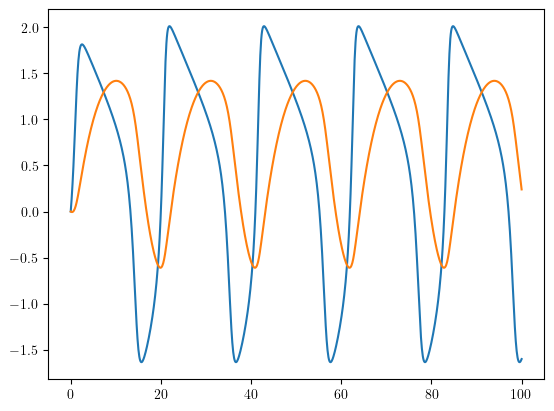

In [115]:
%run FHN_functions.py
eps = .2  # Recovery rate
a = -.2         # Resting state parameter
b = .5       # Adaptation parameter
I = .6         # External stimulus
state0= [0.0, 0.0]
t= np.linspace(0, 100, 1000)
solution = spy.odeint(FHN_1, state0, t, args=(eps, a, b, I))

u, v = solution.T

plt.plot(t, u)
plt.plot(t, v)


In [116]:
#Parameter sets with various behaviour

#set1
eps = .2    # Recovery rate
a = .2      # Resting state 
b = 0.8     # Adaptation parameter
I = .5      # External stimulus
D = 2
N = 10
np.random.seed(42)

(1000, 20)


Text(0, 0.5, 'Cell')

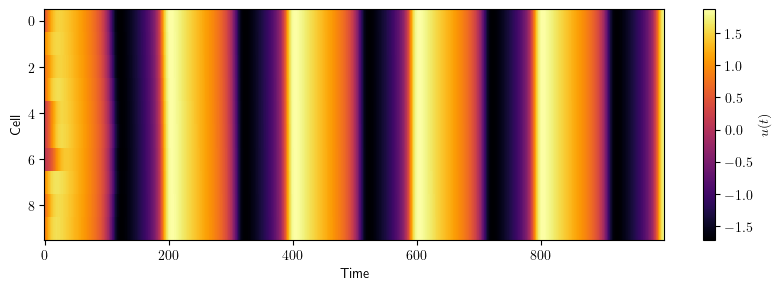

In [170]:

eps = .2  # Recovery rate
a = .2      # Resting state 
b = 0.8     # Adaptation parameter
I = .5     # External stimulus
D = 1
N = 10

np.random.seed(42)
state0 = np.random.uniform(0, 1, 2*N)   

t = np.linspace(0, 100, 1000)

solution = spy.odeint(FHN_String, state0, t, args=(eps, a, b, I, D))
solution2 = solution.T
u, v = solution2[:N, :], solution2[N:,:]
print(solution.shape)

plt.figure(figsize=(10, 3))
plt.imshow(u, aspect='auto', cmap='inferno', interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label('$u(t)$')
plt.xlabel('Time')
plt.ylabel('Cell')


# Modified FHN Oscillators
From Rajeev Sing et al.

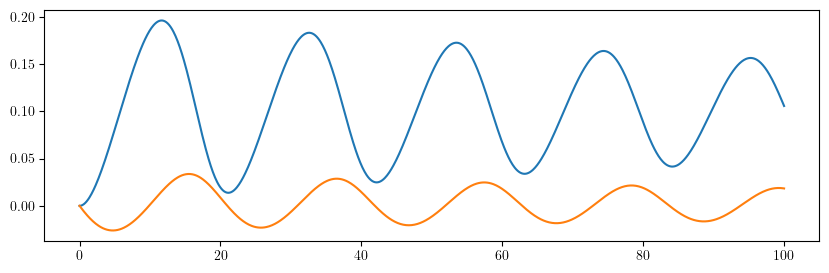

In [235]:
%run FHN_functions.py
a = .1
e = .1
k = 1 #damping
b = .1

t = np.linspace(0, 100, 1000)

state0 = [0.0, 0.0]
FHN2sol = spy.odeint(FHN2, state0, t, args=(a, e, k, b))

u, v  = FHN2sol.T[0, :], FHN2sol.T[1, :]
plt.figure(figsize=(10, 3))
plt.plot(t, u)
plt.plot(t, v)

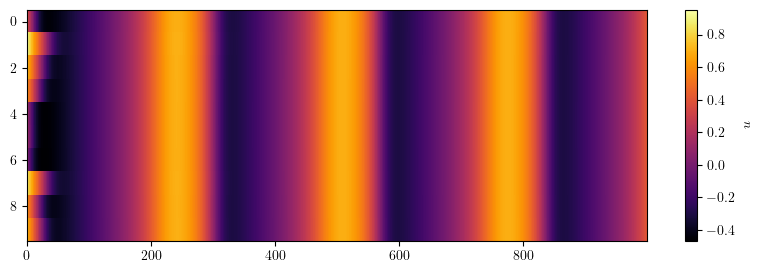

In [ ]:
a = 0
e = .1
k = 1 #damping
b = .1
D = 100
N = 10
# np.random.seed(42)
y0 = np.random.uniform(0, 1, 2*N)
t = np.linspace(0, 100, 1000)
FHNsol2 = spy.odeint(FHN2_String, y0, t, args=(a, e, k, b, D))

u, v = FHNsol2.T[:N, :], FHNsol2.T[N:, :]

plt.figure(figsize=(10, 3))
plt.imshow(u, cmap='inferno',aspect='auto', interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label('$u$')

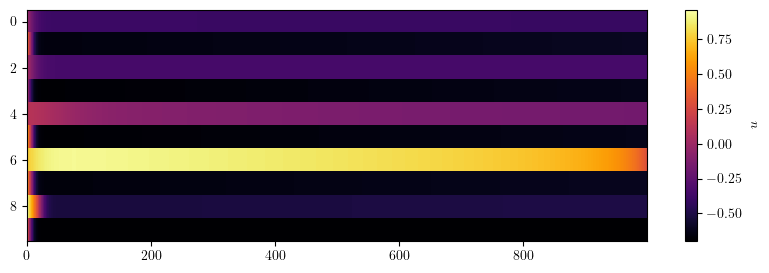

In [ ]:
%run FHN_functions.py

#this parameter values were supposed to give you Antiphase synchronisations
a = .139
e = .001
k = .6
b = 0.064
D = .4e-3
N = 10
# np.random.seed(42)
y0 = np.random.uniform(0, 1, 2*N)
t = np.linspace(0, 100, 1000)
FHNsol2 = spy.odeint(FHN2_String, y0, t, args=(a, e, k, b, D))

u, v = FHNsol2.T[:N, :], FHNsol2.T[N:, :]

plt.figure(figsize=(10, 3))
plt.imshow(u, cmap='inferno',aspect='auto', interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label('$u$')